In [1]:
import pandas as pd

ruta = "/Users/hectorrr/proyectos/pruebas prametricas/dataset-prestamos.csv"
df = pd.read_csv(ruta)
df

,estado,monto
0,Al día,2500
1,Al día,5600
2,Al día,5375
3,Al día,5000
4,Al día,21000
...,...,...
11272,Pagado,6000
11273,Pagado,14400
11274,Pagado,15000
11275,Pagado,24000


In [2]:
df.estado.value_counts()

estado
Al día    7294
Pagado    3907
Impago      76
Name: count, dtype: int64

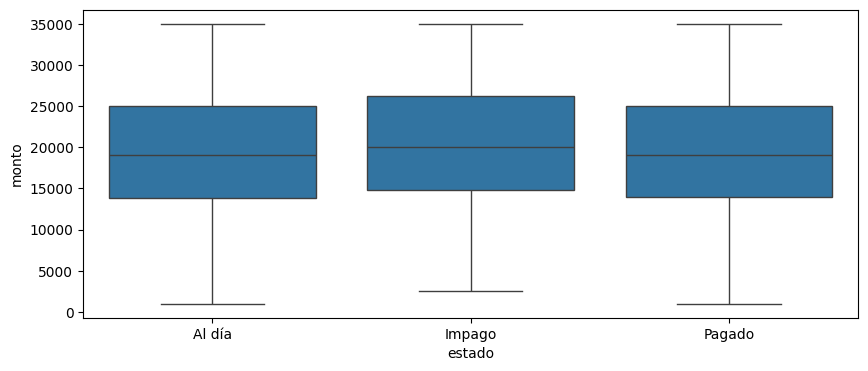

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.boxplot(df, x="estado", y="monto")
plt.show()

In [13]:
import numpy as np
def estimacion_boot(arreglo, M=1000, ic=0.95):
    # Inicialización
    n = len(arreglo)   # Tamaño del set de datos
    muestras = np.zeros((M,n)) # Arreglo de Mxn con las muestras
    # Muestreo aleatorio con reemplazo
    for m in range(M):
        muestras[m,:] = np.random.choice(arreglo, size=n, replace=True)  
    # Calcular distribución muestral "bootstrapping" (medias)
    d_muestral_boot = muestras.mean(axis=1)
    
    # Estimar estadística
    media_boot = d_muestral_boot.mean()
    
    # Estimar error estándar
    error_boot = d_muestral_boot.std()
    
    # Estimar intervalo de confianza
    lim_izq = (1-ic)/2 * 100
    lim_der = (ic + (1-ic)/2) * 100
    
    perc_izq = np.percentile(d_muestral_boot, lim_izq)
    perc_der = np.percentile(d_muestral_boot, lim_der)
    # Retornar estadística estimada, error estándar e intervalo de confianza
    return media_boot, error_boot, [perc_izq, perc_der]  

In [21]:
df_al_dia=df[df["estado"]=="Al día"]
df_pagado=df[df["estado"]=="Pagado"]
media_aldia, error_aldia, ic_aldia,=estimacion_boot(df_al_dia["monto"].to_numpy(),M=500,ic=0.95)
media_pagado, error_pagado, ic_pagado,=estimacion_boot(df_pagado["monto"].to_numpy(),M=10000,ic=0.95)
#media_aldia, error_aldia, ic_aldia,=estimacion_boot(df_al_dia["monto"].to_numpy(),M=1000,ic=0.95)
print(media_aldia, error_aldia, ic_aldia)
print(media_pagado, error_pagado, ic_pagado)

19250.494989032082 89.8546946740358 [np.float64(19074.336012476007), np.float64(19427.094529750477)]
19447.252048886614 126.20838745357273 [np.float64(19199.692219093933), np.float64(19698.075249552086)]
